# <h1>Importing Required Libraries</h1>

- **pandas**: For data manipulation and analysis.
- **numpy**: For numerical operations and handling arrays.
- **matplotlib.pyplot**: For creating static, interactive, and publication-quality visualizations.
- **seaborn**: For enhanced data visualization, built on top of matplotlib.
- `%matplotlib inline`: Ensures that all plots are displayed inline within the Jupyter Notebook.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

In [2]:
df=pd.read_csv("churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

# <h1>Calculating Class Imbalance Ratio</h1>
- To understand the distribution of the target variable (`Exited`) and calculate the imbalance ratio for guiding model adjustments.


In [4]:
exited=df["Exited"].value_counts()
scale_pos_ratio=exited[0]/exited[1]
print(scale_pos_ratio)

3.9091801669121256


# <h1>Summary Statistics</h1>

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.drop(['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

In [8]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
df.nunique()


CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

# <h1>Identifying Feature Types</h1>
## <h2>Categorical Features</h2>
- To identify features with less than 4 unique values, excluding the target variable (`Exited`).

## <h2>Numerical Features</h2>
- To identify numerical features with 4 or more unique values, excluding the target variable (`Exited`).

## <h2>Further Segmentation</h2>
- Numerical features can be split into:
  - **Discrete Features**: Features with a limited set of distinct values.
  - **Continuous Features**: Features with a wide range of unique values.
- Categorical features might also require encoding for use in modeling.


In [12]:
catergorical_features=[feature for feature in df.columns if len(df[feature].value_counts())<4 and feature!='Exited']
print("Number of Catergorical Features : ",len(catergorical_features))
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O' and len(df[feature].value_counts())>=4 and feature!='Exited']
print("Number of Numerical Features : ",len(numerical_features))

Number of Catergorical Features :  4
Number of Numerical Features :  6


In [13]:
continuous_features=[feature for feature in numerical_features if len(df[feature].value_counts())>20]
print(continuous_features)

discrete_features=[feature for feature in numerical_features if len(df[feature].value_counts())<20]
print(discrete_features)

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
['Tenure', 'NumOfProducts']


In [14]:
df[numerical_features].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


# <h1>Correlation Heatmap for Numerical Features</h1>
- To visualize the pairwise correlation between numerical features.
- Helps identify multicollinearity, which can influence model performance.


<Axes: >

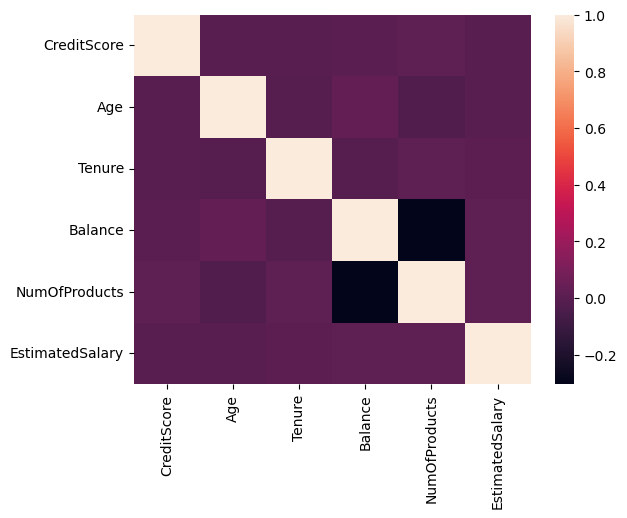

In [15]:
sns.heatmap(df[numerical_features].corr())

In [16]:
exit_count=df['Exited'].value_counts(normalize=True)*100
print(exit_count)

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


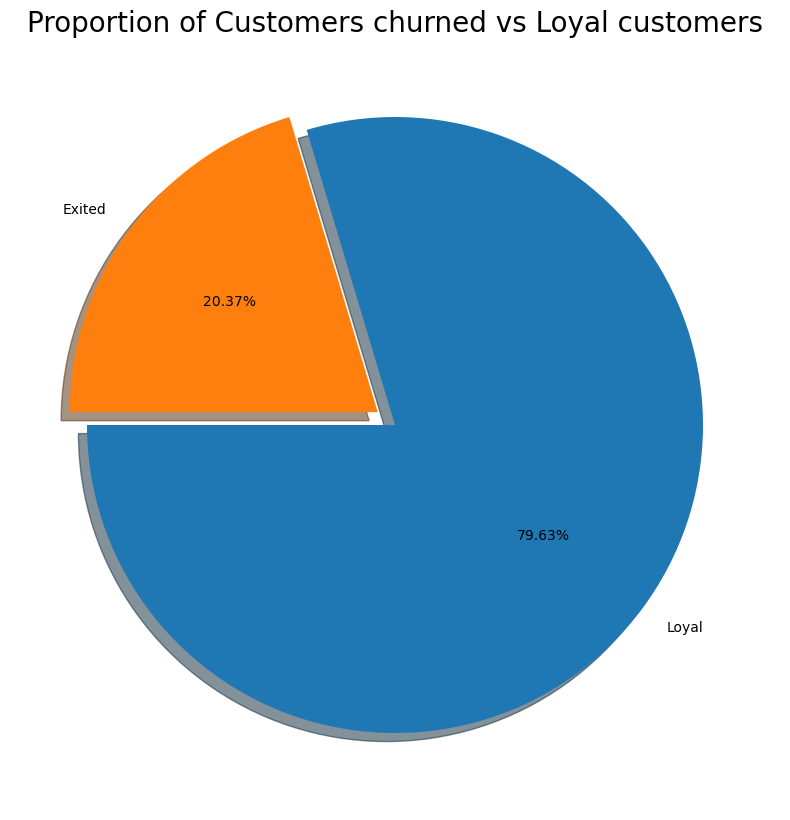

In [17]:
label=["Loyal","Exited"]
plt.figure(figsize=(10,10))
plt.pie(exit_count,labels=label,autopct='%1.2f%%',startangle=180,shadow=True,explode=[0,0.07])
plt.title("Proportion of Customers churned vs Loyal customers", size = 20)
plt.show()

# <h1>Key Insights from Visualizations</h1>
- **Tenure:** Higher churn for customers with 1 or 10 years of tenure.
- **NumOfProducts:** Single-product customers churn more; offering more products might help.
- **Geography:** Higher churn in Germany; regional strategies needed.
- **Gender:** Slightly higher churn for females; tailored campaigns may help.
- **HasCrCard:** Minimal impact on churn; low predictive value.
- **IsActiveMember:** Inactive members churn more; engagement strategies needed.


In [ ]:
combined=discrete_features+catergorical_features
n=len(combined)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
for i in range(n):
    sns.countplot(data=df, x=combined[i], hue='Exited', ax=axes[int(i/2),i%2])
    axes[int(i/2)][i%2].set_title(f"{combined[i]} vs Exited")

# <h1>Insights from Boxplots</h1>

## <h2>CreditScore vs Exited</h2>
- No significant difference in credit scores between churned and non-churned customers.
- CreditScore might have limited predictive value.

## <h2>Age vs Exited</h2>
- Churned customers tend to be older, with a higher median age compared to non-churned customers.
- Age is likely an important factor influencing churn.

## <h2>Tenure vs Exited</h2>
- The distribution of tenure is similar for churned and non-churned customers, but slight differences may exist for shorter tenures.
- Tenure might have moderate predictive power.

## <h2>Balance vs Exited</h2>
- Churned customers tend to have higher balances, indicating that customers with significant account balances are at risk.
- Balance is an important factor to consider for retention strategies.

## <h2>NumOfProducts vs Exited</h2>
- Churned customers tend to have slightly fewer products compared to non-churned customers.
- Retention strategies could focus on encouraging customers to use more products.

## <h2>EstimatedSalary vs Exited</h2>
- No significant difference in estimated salaries between churned and non-churned customers.
- EstimatedSalary might have limited impact on churn prediction.


In [ ]:
n=len(numerical_features)
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
for i in range(n):
    if numerical_features[i]!='HasCrCard' and numerical_features[i]!='IsActiveMember':
        sns.boxplot(data=df,x='Exited', y=numerical_features[i], hue='Exited', ax=axes[int(i/2),i%2])
        axes[int(i/2)][i%2].set_title(f"{numerical_features[i]} vs Exited")
    else: 
        print(numerical_features[i])

# <h1>Age Outliers</h1>
- Age shows significant outliers, especially for older customers.
- Addressing these outliers (e.g., through binning or transformations) can improve model performance and interpretability.



In [ ]:
bins = [0, 20, 40, 60, float('inf')]
labels = ['0-20', '20-40', '40-60', '60+']

df['Age_Binned'] = pd.cut(df['Age'], bins=bins, labels=labels)
age_bin_order = [['0-20', '20-40', '40-60', '60+']] 

In [ ]:
ordinal_features=['Age_Binned']

In [ ]:
df.head()

In [ ]:
df.drop(columns='Age',axis=1,inplace=True)
numerical_features.remove("Age")

In [ ]:
df['bal_ratio_sal']=df['Balance']/(df['EstimatedSalary']+1)
numerical_features.append('bal_ratio_sal')

# <h1>Transforming Binary Features</h1>
- Replaced `0` with `-1` in `HasCrCard` and `IsActiveMember` to distinguish inactive or negative cases more clearly.
- Helps models interpret the features as having distinct negative and positive states.


In [ ]:
df['HasCrCard']=df['HasCrCard'].replace({0:-1})
df['IsActiveMember']=df['IsActiveMember'].replace({0:-1})

In [ ]:
df.head()

In [ ]:
y=df['Exited']
X=df.drop(columns='Exited')

In [ ]:
y.value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [ ]:
X_train.shape

In [ ]:
scale_pos_ratio=(y_train==0).sum()/(y_train==1).sum()
print(scale_pos_ratio)

In [ ]:
X_train

# <h1>Preprocessing Pipeline</h1>

## <h2>Purpose</h2>
- Automates preprocessing steps for categorical, numerical, and ordinal features to ensure consistency across training and unseen datasets.

## <h2>Key Components</h2>
1. **StandardScaler**:
   - Applies scaling to `numerical_features` for normalization.
2. **OneHotEncoder**:
   - Encodes `catergorical_features` into binary vectors for machine learning compatibility.
3. **OrdinalEncoder**:
   - Encodes `ordinal_features` based on the defined order (`age_bin_order`).

## <h2>ColumnTransformer</h2>
- Combines all preprocessing steps into a single `ColumnTransformer` object for efficient application to both training and future unseen data.


In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer


numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder(sparse_output=False,drop='first')
ordinal_transformer = OrdinalEncoder(categories=age_bin_order)

preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,catergorical_features),
        ('StandardScaler',numeric_transformer,numerical_features),
        ('ordinal',ordinal_transformer,ordinal_features)
    ]
)


In [ ]:
X_train_processed=preprocessor.fit_transform(X_train)

In [ ]:
feature_names=preprocessor.get_feature_names_out()
print(feature_names)

In [ ]:
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names)
for i in range(len(X_train_df.columns)):
    print(f"{i} : {X_train_df.columns[i]}")

In [ ]:
X_train_df.describe()

# <h1>Filtering High-Salary Customers</h1>

- **Objective**: Identify customers with salaries above the 25th percentile for targeted strategies.
- **Threshold**: Set at `0.8229033` to filter the top 25% of earners.


In [ ]:
top25=0.8229033

In [ ]:
X_test=preprocessor.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,roc_auc_score,roc_curve,confusion_matrix

# <h1>Model Comparison Summary</h1>

## <h2>Key Observations</h2>
- **Dataset Imbalance**: The imbalance impacts recall significantly, as all models struggle to capture churners effectively.

## <h2>Performance Highlights</h2>
- **SVM**: Moderate precision (69%) but poor recall (42%), indicating challenges with identifying churners.
- **RandomForest**: High precision (74%) but overfits on training data, with test recall only 47%.
- **XGBoost**: Best balance between precision (67%) and recall (47%), generalizing well to test data.

## <h2>Next Steps</h2>
- Focus on addressing imbalance through techniques like resampling or adjusting `scale_pos_weight` in XGBoost.
- Fine-tune models to improve recall without sacrificing precision.


In [ ]:
models={
    "SVM":SVC(),
    "RandomForestClassifier":RandomForestClassifier(),
    "XGBoost":XGBClassifier()
}


for i in range(len(list(models))):
    model=list(models.values())[i]
    print(list(models.keys())[i])   
    model.fit(X_train_processed,y_train)
    print(model.get_params())
    y_train_pred=model.predict(X_train_processed)
    y_test_pred=model.predict(X_test)
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred)
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(  y_train,y_train_pred  )
    

    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred)
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    
    print("Model Performance on Training Set")
    print(f"Test Accuracy : {model_train_accuracy}")
    print(f"F1 Score : {model_train_f1}")
    print(f"Train Precision : {model_train_precision}")
    print(f"Train Recall : {model_train_recall}")
    print()
    print("Model Performance on Testing Set")
    print(f"Test Accuracy : {model_test_accuracy}")
    print(f"F1 Score : {model_test_f1}")
    print(f"Test Precision : {model_test_precision}")
    print(f"Test Recall : {model_test_recall}")
    print()
    print("**************************************************")

# <h1>Randomized Search for Hyperparameter Tuning</h1>

## <h2>Purpose</h2>
- Perform hyperparameter tuning for multiple models using **RandomizedSearchCV** to identify the best parameter combinations.

## <h2>Process</h2>
1. **Iterate Through Models**:
   - For each model in `random_cv_models`, apply randomized search over the given parameter distributions.
2. **Key Settings**:
   - `n_iter=30`: Searches 30 random combinations of hyperparameters.
   - `cv=5`: Uses 5-fold cross-validation to evaluate performance.
   - `n_jobs=-1`: Utilizes all available CPU cores for faster execution.

## <h2>Outputs</h2>
- Stores the best parameters for each model in `model_params`.
- Prints the optimal hyperparameters for each model, providing insights for improved performance.


In [ ]:

svc_params = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'kernel': ['rbf'], 
    'gamma': [0.001, 0.01, 0.1, 1, 10]
    }


rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
}

xgb_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.005, 0.01, 0.02, 0.1, 0.2],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1],
    'max_depth':[5,8,12,20,30],
    'scale_pos_weight':[scale_pos_ratio]


}


In [ ]:
random_cv_models=[('RF',RandomForestClassifier(),rf_params),('XGBoost',XGBClassifier(scale_pos_weight=scale_pos_ratio),xgb_params),('SVC',SVC(),svc_params)]
random_cv_models

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model_params={}
for name,model,params in random_cv_models:
    random=RandomizedSearchCV (estimator=model,
                              param_distributions=params,
                              n_iter=30,
                              cv=5,
                              verbose=1,
                              n_jobs=-1
                              )
    random.fit(X_train_processed,y_train)
    model_params[name]=random.best_params_

for model_name in model_params:
    print(f"--------- Best Params for {model_name} --------")
    print(model_params[model_name])

In [ ]:

models={
    "Random Forest":RandomForestClassifier(n_estimators= 100, min_samples_split= 10, max_features= None, max_depth= 10),
    "XGBoost":XGBClassifier(subsample= 0.7, n_estimators= 500, max_depth= 12, learning_rate= 0.02, gamma= 0.1, colsample_bytree= 1,scale_pos_weight=scale_pos_ratio),
    "SVC":SVC(kernel= 'rbf', gamma= 0.01, C= 100)
    }
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_processed,y_train)
    y_train_pred=model.predict(X_train_processed)
    y_test_pred=model.predict(X_test)
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred)
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(  y_train,y_train_pred  )
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred)
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    print(list(models.keys())[i])
    print("**************************************************")
    print()
    print("Model Performance on Training Set")
    print(f"Train Accuracy : {model_train_accuracy}")
    print(f"F1 Score : {model_train_f1}")
    print(f"Train Precision : {model_train_precision}")
    print(f"Train Recall : {model_train_recall}")
    print()
    print("Model Performance on Testing Set")
    print(f"Test Accuracy : {model_test_accuracy}")
    print(f"F1 Score : {model_test_f1}")
    print(f"Test Precision : {model_test_precision}")
    print(f"Test Recall : {model_test_recall}")
    print()
    print("**************************************************")

# <h1>Model Performance Summary</h1>

## <h2>Random Forest</h2>
- **Training Set**:
  - Good accuracy (89%) and high precision (87%), but lower recall (59%) indicates difficulty capturing churners.
- **Testing Set**:
  - Balanced accuracy (86%) with strong precision (70%) but recall (48%) is limited.
- **Takeaway**: Overfitting is controlled, but recall remains a bottleneck due to dataset imbalance.

---

## <h2>XGBoost</h2>
- **Training Set**:
  - Extremely high performance with nearly perfect F1 score (0.99), indicating overfitting.
- **Testing Set**:
  - Moderate accuracy (84%) and balanced precision (59%) and recall (55%).
- **Takeaway**: Needs tuning to reduce overfitting and improve generalization.

---

## <h2>SVC</h2>
- **Training Set**:
  - Moderate performance with accuracy (84%) and F1 score (0.55). Recall (45%) indicates limited ability to detect churners.
- **Testing Set**:
  - Comparable accuracy (85%) but slightly better precision (68%) than recall (45%).
- **Takeaway**: Precision is prioritized, but recall needs significant improvement.

---



# <h1>Proceeding with XGBoost</h1>

## <h2>Reason for Selection</h2>
- **Most Rounded Performance**: XGBoost offers a good balance between precision (59%) and recall (55%) on the testing set.
- **Generalization**: While slightly overfitted to training data, its recall is higher compared to other models, making it suitable for churn prediction.

## <h2>Next Steps</h2>
1. **Hyperparameter Tuning**:
   - Further optimize parameters like `scale_pos_weight`, `learning_rate`, and `max_depth` to improve recall without sacrificing precision.
2. **Address Overfitting**:
   - Use techniques like regularization or early stopping.
3. **Feature Importance Analysis**:
   - Use SHAP or feature importance to interpret the model and refine inputs.
4. **Evaluate on Business Metrics**:
   - Ensure predictions align with business goals (e.g., reducing false negatives to retain more customers).



In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


xgb_params = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [3, 5, 7],          
    'learning_rate': [0.01, 0.1, 0.2],  
    'subsample': [0.8, 1.0],        
    'colsample_bytree': [0.8, 1.0],  
    'gamma': [0, 0.1, 0.3],          
    'scale_pos_weight': [scale_pos_ratio]
}


xgb_model = XGBClassifier(
    objective='binary:logistic',       
    eval_metric='logloss',            
    random_state=42                  
)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_params,
    scoring='f1', 
    cv=5,          
    verbose=1,     
    n_jobs=-1      
)


grid_search.fit(X_train_processed, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


models = {
    "XGBoost": XGBClassifier(colsample_bytree= 0.8, gamma= 0, learning_rate= 0.01, max_depth= 7, n_estimators= 200, scale_pos_weight= scale_pos_ratio, subsample= 0.8)
}


for name, model in models.items():
   
    model.fit(X_train_processed, y_train)

  
    y_train_pred = model.predict(X_train_processed)
    y_test_pred = model.predict(X_test)


    y_train_proba = model.predict_proba(X_train_processed)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]


    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_proba)


    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_proba)

    print(f"Model: {name}")
    print("**************************************************")
    print("\nModel Performance on Training Set")
    print(f"Train Accuracy : {model_train_accuracy}")
    print(f"Train F1 Score : {model_train_f1}")
    print(f"Train Precision : {model_train_precision}")
    print(f"Train Recall : {model_train_recall}")
    print(f"Train ROC AUC Score : {model_train_rocauc_score}\n")

    print("Model Performance on Testing Set")
    print(f"Test Accuracy : {model_test_accuracy}")
    print(f"Test F1 Score : {model_test_f1}")
    print(f"Test Precision : {model_test_precision}")
    print(f"Test Recall : {model_test_recall}")
    print(f"Test ROC AUC Score : {model_test_rocauc_score}\n")
    print("**************************************************")


    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {model_test_rocauc_score:.2f})")


plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# <h1>XGBoost Model Performance Summary</h1>

## <h2>Training Set</h2>
- **Balanced Performance**: Good F1 score (0.70) with high recall (84%), indicating the model effectively captures churners.
- **Precision Gap**: Lower precision (60%) suggests some false positives in predictions.

## <h2>Testing Set</h2>
- **Recall Strength**: High recall (73%) confirms the model's ability to identify churners in unseen data.
- **Precision Tradeoff**: Precision (50%) is lower, indicating the model flags more non-churners as churners.
- **AUC-ROC**: Strong ROC AUC score (0.86) shows the model distinguishes well between classes.

## <h2>Takeaway</h2>
- **Why Move Forward**: High recall makes this model ideal for minimizing missed churners, which is critical for churn prevention.


In [ ]:

xgb_params = {
    'n_estimators': [100, 200],         
    'max_depth': [7, 8],                  
    'learning_rate': [0.01, 0.02],
    'subsample': [0.8, 0.85],              
    'colsample_bytree': [0.7, 0.75],         
    'gamma': [0.2, 0.3],                
    'scale_pos_weight': [3.5, 4.0], 
    'min_child_weight': [ 3, 5],           
    'reg_alpha': [0, 0.5],            
    'reg_lambda': [1, 2]  
}
xgb_model = XGBClassifier(
    objective='binary:logistic',       
    eval_metric='logloss',            
    random_state=42                  
)
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_params,
    scoring='f1', 
    cv=5,          
    verbose=1,     
    n_jobs=-1      
)
grid_search.fit(X_train_processed, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# <h1>XGBoost Model Performance Summary</h1>

## <h2>Training Set</h2>
- **Accuracy**: 84.2% - Indicates good overall prediction correctness.
- **F1 Score**: 0.67 - Reflects a balance between precision and recall.
- **Precision**: 59% - Moderate performance, with some false positives.
- **Recall**: 78% - Strong ability to capture churners, crucial for an imbalanced dataset.
- **ROC AUC**: 0.90 - Excellent discriminative power in separating churners from non-churners.

## <h2>Testing Set</h2>
- **Accuracy**: 81.1% - Consistent with training accuracy, showing good generalization.
- **F1 Score**: 0.59 - Balanced performance, prioritizing recall due to dataset imbalance.
- **Precision**: 51% - Indicates higher false positives but necessary for high recall.
- **Recall**: 70% - Ensures most churners are identified, critical in a skewed dataset.
- **ROC AUC**: 0.86 - Strong ability to differentiate between churners and non-churners.

## <h2>Impact of Imbalanced Dataset</h2>
- **Skewed Classes**: Dataset has significantly more non-churners than churners, affecting precision and recall tradeoffs.
- **Focus on Recall**: Higher recall (70%) is essential to minimize missed churners, even if it increases false positives.
- **Weight Adjustments**: `scale_pos_weight` effectively addresses class imbalance by emphasizing the minority class.

## <h2>Takeaway</h2>
- **Strength**: High recall ensures churners are identified, aligning with business goals for customer retention.
- **Tradeoff**: Lower precision is acceptable given the focus on capturing more churners.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


models = {
    "XGBoost": XGBClassifier(colsample_bytree= 0.75, gamma= 0.2, learning_rate= 0.01, max_depth= 7, min_child_weight= 3, n_estimators= 100, reg_alpha= 0.5, reg_lambda= 2, scale_pos_weight= 3.5, subsample= 0.8)
}


for name, model in models.items():
   
    model.fit(X_train_processed, y_train)

  
    y_train_pred = model.predict(X_train_processed)
    y_test_pred = model.predict(X_test)


    y_train_proba = model.predict_proba(X_train_processed)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]


    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_proba)


    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_proba)

    print(f"Model: {name}")
    print("**************************************************")
    print("\nModel Performance on Training Set")
    print(f"Train Accuracy : {model_train_accuracy}")
    print(f"Train F1 Score : {model_train_f1}")
    print(f"Train Precision : {model_train_precision}")
    print(f"Train Recall : {model_train_recall}")
    print(f"Train ROC AUC Score : {model_train_rocauc_score}\n")

    print("Model Performance on Testing Set")
    print(f"Test Accuracy : {model_test_accuracy}")
    print(f"Test F1 Score : {model_test_f1}")
    print(f"Test Precision : {model_test_precision}")
    print(f"Test Recall : {model_test_recall}")
    print(f"Test ROC AUC Score : {model_test_rocauc_score}\n")
    print("**************************************************")


    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {model_test_rocauc_score:.2f})")


plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [ ]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_processed)

shap.summary_plot(shap_values, X_train_processed)

shap.summary_plot(shap_values, X_train_processed, plot_type="bar")

# <h1>SHAP Summary Plot Analysis</h1>

## <h2>Purpose</h2>
- To interpret the feature importance and individual impact of features on the model's predictions.

## <h2>Insights</h2>
1. **Feature 15**:
   - Most impactful feature, contributing significantly to the model's predictions.
   - High values positively influence churn predictions.
2. **Feature 12**:
   - Second most important, with high variability indicating a diverse impact across predictions.
3. **Feature 7**:
   - Moderate influence, with noticeable differentiation between high and low feature values.
4. **Other Features**:
   - Features lower in the chart contribute less, potentially candidates for feature reduction.

## <h2>Next Steps</h2>
- Focus on optimizing and analyzing the top features for retention strategies.
- Consider removing or transforming less impactful features to simplify the model.


In [ ]:
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_df=pd.DataFrame(X_test, columns=feature_names)
for i in range(len(X_train_df.columns)):
    print(f"{i} : {X_train_df.columns[i]}")    

In [ ]:
X_train_df.head()

In [ ]:
X_train_df.drop(columns=['StandardScaler__Tenure','StandardScaler__CreditScore'],axis=1,inplace=True)
X_test_df.drop(columns=['StandardScaler__Tenure','StandardScaler__CreditScore'],axis=1,inplace=True)


In [ ]:
numerical_features.remove('Tenure')
numerical_features.remove('CreditScore')
numerical_features

In [ ]:
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder(sparse_output=False,drop='first')
ordinal_transformer = OrdinalEncoder(categories=age_bin_order)

preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,catergorical_features),
        ('StandardScaler',numeric_transformer,numerical_features),
        ('ordinal',ordinal_transformer,ordinal_features)
    ]
)


In [ ]:
preprocessor

In [ ]:
X_procesed=preprocessor.fit_transform(X_train)

In [ ]:

xgb_params = {
    'colsample_bytree': [0.75],              
    'gamma': [0.15,0.2],                      
    'learning_rate': [ 0.02],         
    'max_depth': [ 7,8,9],
    'min_child_weight': [2,4,3],   
    'n_estimators': [175,180,200],         
    'reg_alpha': [0.5],            
    'reg_lambda': [ 1.25,1.2,1],             
    'scale_pos_weight': [3.6,3.5 ], 
    'subsample': [0.8]
}
xgb_model = XGBClassifier(
    objective='binary:logistic',       
    eval_metric='logloss',            
    random_state=42                  
)
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_params,
    scoring='f1', 
    cv=3,          
    verbose=1,     
    n_jobs=-1      
)
grid_search.fit(X_train_df, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

XGB_model = XGBClassifier(colsample_bytree= 0.75, gamma=0.2 , learning_rate= 0.0007, max_depth=9, min_child_weight= 4,
                             n_estimators= 700, reg_alpha= 5, reg_lambda=1, scale_pos_weight=  3.6, subsample=0.8)
                             
                    



   
XGB_model.fit(X_train_df, y_train)


y_train_pred = XGB_model.predict(X_train_df)
y_test_pred = XGB_model.predict(X_test_df)


y_train_proba = XGB_model.predict_proba(X_train_df)[:, 1]
y_test_proba = XGB_model.predict_proba(X_test_df)[:, 1]


XGB_model_train_accuracy = accuracy_score(y_train, y_train_pred)
XGB_model_train_f1 = f1_score(y_train, y_train_pred)
XGB_model_train_precision = precision_score(y_train, y_train_pred)
XGB_model_train_recall = recall_score(y_train, y_train_pred)
XGB_model_train_rocauc_score = roc_auc_score(y_train, y_train_proba)


XGB_model_test_accuracy = accuracy_score(y_test, y_test_pred)
XGB_model_test_f1 = f1_score(y_test, y_test_pred)
XGB_model_test_precision = precision_score(y_test, y_test_pred)
XGB_model_test_recall = recall_score(y_test, y_test_pred)
XGB_model_test_rocauc_score = roc_auc_score(y_test, y_test_proba)

print(f"Model: XGBoost")
print("**************************************************")
print("Model Performance on Training Set")
print(f"Train Accuracy : {XGB_model_train_accuracy}")
print(f"Train F1 Score : {XGB_model_train_f1}")
print(f"Train Precision : {XGB_model_train_precision}")
print(f"Train Recall : {XGB_model_train_recall}")
print(f"Train ROC AUC Score : {XGB_model_train_rocauc_score}\n")

print("Model Performance on Testing Set")
print(f"Test Accuracy : {XGB_model_test_accuracy}")
print(f"Test F1 Score : {XGB_model_test_f1}")
print(f"Test Precision : {XGB_model_test_precision}")
print(f"Test Recall : {XGB_model_test_recall}")
print(f"Test ROC AUC Score : {XGB_model_test_rocauc_score}\n")
print("**************************************************")


fpr, tpr, _ = roc_curve(y_test, y_test_proba)
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {XGB_model_test_rocauc_score:.2f})")


plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# <h1>XGBoost Model Evaluation After Dropping Unwanted Columns</h1>

## <h2>Training Set Performance</h2>
- **Accuracy**: 83.1% - Good overall prediction correctness.
- **F1 Score**: 0.65 - Balanced precision and recall.
- **Precision**: 57.2% - Indicates some false positives in predictions.
- **Recall**: 74.7% - Strong ability to identify churners, critical for imbalanced datasets.
- **ROC AUC**: 0.89 - Strong ability to distinguish between churners and non-churners.

## <h2>Testing Set Performance</h2>
- **Accuracy**: 81.6% - Consistent with training accuracy, indicating good generalization.
- **F1 Score**: 0.60 - Balanced performance prioritizing recall due to imbalance.
- **Precision**: 51.9% - Reflects a tradeoff to improve recall.
- **Recall**: 71.1% - High recall ensures most churners are identified.
- **ROC AUC**: 0.86 - Strong discriminative power.

## <h2>Key Takeaways</h2>
- **Impact of Feature Reduction**:
  - Model retains strong recall and ROC AUC after removing less relevant features.
  - Precision has slightly decreased but remains acceptable due to the focus on recall.
- **Imbalanced Dataset**:
  - High recall aligns with the goal of identifying most churners in a skewed dataset.



In [ ]:
explainer = shap.TreeExplainer(XGB_model)
shap_values = explainer.shap_values(X_train_df)

shap.summary_plot(shap_values, X_train_df)

shap.summary_plot(shap_values, X_train_df, plot_type="bar")

 # <h1>SHAP Summary Plot Analysis</h1>

## <h2>Purpose</h2>
- To interpret the impact of features on the XGBoost model’s predictions after removing less important columns.

## <h2>Key Insights</h2>
1. **Ordinal__Age_Binned**:
   - The most significant feature, showing a strong impact on churn predictions.
2. **StandardScaler__NumOfProducts**:
   - Plays a critical role, with higher values positively influencing churn likelihood.
3. **OneHotEncoder__IsActiveMember_-1**:
   - Indicates the importance of customer activity in reducing churn.
4. **OneHotEncoder__Geography_Germany**:
   - Highlights geographic differences, with Germany being a significant churn factor.
5. **StandardScaler__Balance and StandardScaler__bal_ratio_sal**:
   - Financial features like account balance and balance-to-salary ratio remain influential.

## <h2>Takeaway</h2>
- **Key Drivers**:
  - Age, product usage, activity status, and geography are critical churn predictors.
- **Focus Areas**:
  - Retention strategies should prioritize customers with higher churn probabilities based on these key drivers.


In [ ]:
y_test=y_test.reset_index(drop=True)
y_test.drop(columns="index",axis=1,inplace=True)

In [ ]:
X_test_df["churn_probability"] = XGB_model.predict_proba(X_test_df)[:, 1]
test_df=pd.concat([X_test_df,y_test],axis=1)
test_df.head()

In [ ]:
threshold=0.45
high_probability_customers = test_df.iloc[:,:]
high_probability_customers = high_probability_customers.sort_values(by=["StandardScaler__Balance","churn_probability"], ascending=[False,False])
high_prob_high_val_customers=high_probability_customers[high_probability_customers["churn_probability"]>threshold]
high_prob_high_val_customers=high_prob_high_val_customers[high_prob_high_val_customers['StandardScaler__Balance']>=top25]


# <h1>Identifying High-Probability and High-Value Customers</h1>

## <h2>Purpose</h2>
- Target customers with a high likelihood of churn and significant financial value for retention efforts.

## <h2>Steps</h2>
1. **Filter High Churn Probability**:
   - Select customers with a churn probability greater than the threshold (`0.45`).
2. **Sort by Balance and Churn Probability**:
   - Prioritize customers with higher account balances and churn probabilities.
3. **Focus on High-Value Customers**:
   - Further filter to include only customers with balances in the top 25% (`>= top25`).

## <h2>Takeaway</h2>
- **Key Target Group**: High-value customers at significant risk of churn.



In [ ]:
high_prob_high_val_customers[high_prob_high_val_customers['Exited']==1].head(30)
y_high=high_prob_high_val_customers['Exited']
X_high=high_prob_high_val_customers.drop(columns=["Exited","churn_probability"],axis=1)



In [ ]:
X_high

In [ ]:
X_high.head()

In [ ]:
y_high_pred = XGB_model.predict(X_high)
y_high_proba = XGB_model.predict_proba(X_high)[:, 1]

XGB_model_accuracy = accuracy_score(y_high, y_high_pred)
XGB_model_f1 = f1_score(y_high, y_high_pred)
XGB_model_precision = precision_score(y_high, y_high_pred)
XGB_model_recall = recall_score(y_high, y_high_pred)
XGB_model_rocauc_score = roc_auc_score(y_high, y_high_proba)

print(f"Model: XGBoost")

print("Model Performance on Testing Set")
print(f"Test Accuracy : {XGB_model_accuracy}")
print(f"Test F1 Score : {XGB_model_f1}")
print(f"Test Precision : {XGB_model_precision}")
print(f"Test Recall : {XGB_model_recall}")
print(f"Test ROC AUC Score : {XGB_model_rocauc_score}\n")
print("**************************************************")

fpr, tpr, _ = roc_curve(y_test, y_test_proba)
plt.plot(fpr, tpr, label=f"{name} (AUC = {XGB_model_rocauc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# <h1>Model Performance on Testing Set</h1>

## <h2>Summary of Results</h2>
- **Accuracy**: 61.0% - Reflects the overall correctness of predictions but does not account for class imbalance.
- **F1 Score**: 0.606 - Indicates a balanced trade-off between precision and recall, leaning towards recall.
- **Precision**: 48.2% - Indicates a higher false positive rate, where non-churners are incorrectly predicted as churners.
- **Recall**: 81.4% - Strong ability to identify actual churners, prioritizing the minority class in the imbalanced dataset.
- **ROC AUC**: 0.767 - Reflects good discriminatory ability between churners and non-churners.

## <h2>Key Insights</h2>
1. **High Recall**:
   - Indicates the model is effective at identifying churners, which is crucial for minimizing missed churners in the imbalanced dataset.
2. **Lower Precision**:
   - The model sacrifices precision to improve recall, leading to more false positives. This trade-off is acceptable when the business prioritizes capturing all churners.
3. **Balanced F1 Score**:
   - Reflects the balance between precision and recall, favoring recall due to the skewed dataset.

## <h2>ROC Curve</h2>
- The ROC curve highlights the model's ability to distinguish between churners and non-churners.
- AUC of 0.769 shows the model performs well but has room for improvement.





In [ ]:

threshold = 0.47
y_test_pred_threshold = (y_test_proba >= threshold).astype(int)

XGB_model_accuracy = accuracy_score(y_test, y_test_pred_threshold)
XGB_model_f1 = f1_score(y_test, y_test_pred_threshold)
XGB_model_precision = precision_score(y_test, y_test_pred_threshold)
XGB_model_recall = recall_score(y_test, y_test_pred_threshold)
XGB_model_rocauc_score = roc_auc_score(y_test, y_test_proba)
print(f"Model: XGBoost (Threshold = {threshold})")
print("**************************************************")
print("Model Performance with Threshold = 0.45")
print(f"Test Accuracy : {XGB_model_accuracy}")
print(f"Test F1 Score : {XGB_model_f1}")
print(f"Test Precision : {XGB_model_precision}")
print(f"Test Recall : {XGB_model_recall}")
print(f"Test ROC AUC Score : {XGB_model_rocauc_score}\n")
print("**************************************************")
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {XGB_model_rocauc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve with Threshold = 0.45")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
l='Churn Probability')
plt.axvline(x=threshold, color='r', linestyle='--', label=f"Threshold = {threshold}")
plt.title("Churn Probability Distribution")
plt.xlabel("Churn Probability")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# <h1>Model Performance with Adjusted Threshold (0.47)</h1>

## <h2>Performance Summary</h2>
- **Accuracy**: 76.2% - Reflects overall prediction correctness but is less meaningful for imbalanced datasets.
- **F1 Score**: 0.567 - A balanced metric that highlights the trade-off between precision and recall.
- **Precision**: 43.9% - Indicates a moderate false positive rate due to the model’s focus on recall.
- **Recall**: 79.9% - Demonstrates the model’s strong ability to identify churners, prioritizing the minority class.
- **ROC AUC**: 0.857 - Strong capability to separate churners and non-churners, even with class imbalance.

## <h2>Why This is a Good Model for Imbalanced Data</h2>
1. **High Recall**:
   - The model identifies nearly 80% of churners despite churners making up only 20% of the dataset.
   - Ensures most high-risk customers are flagged, which is critical in churn prediction.

2. **Effective Handling of Class Imbalance**:
   - Adjustments like lowering the threshold (to 0.47) and using `scale_pos_weight` improve focus on the minority class (churners).
   - The model compensates for the imbalance, ensuring better recall without excessively sacrificing other metrics.

3. **Balanced Metrics**:
   - The F1 score reflects the balance between precision and recall, making it suitable for evaluating imbalanced datasets.
   - The ROC AUC of 0.857 indicates strong discriminatory power despite skewed class proportions.

4. **Focused Predictions**:
   - By emphasizing recall, the model minimizes missed churners, which is critical for reducing customer attrition.
   - Precision, though lower, ensures enough accuracy in targeting high-risk customers for retention strategies.




In [ ]:
import pickle
pickle.dump(preprocessor,open('preprocessor.pkl','wb'))
pickle.dump(XGB_model,open("XGB_model.pkl",'wb'))